In [15]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


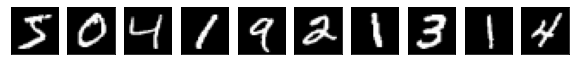

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

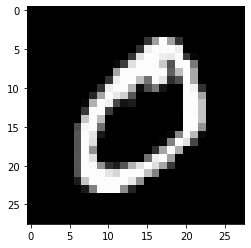

In [18]:
xx_train = x_train.astype('float32') / 255.
xx_test = x_test.astype('float32') / 255.
plt.imshow(x_train[1].reshape(28,28))
plt.show()

In [19]:
XX_train = xx_train.T
XX_test = xx_test.T
print(XX_train.shape)
print(y_train.shape)
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print(Y_train.shape)

(784, 60000)
(60000,)
(60000, 10)


In [20]:
def initialize_param(d):
  w = np.zeros((d,10))
  print("w shape", w.shape)
  b = np.zeros((10,1))
  params = {"w": w,"b": b}
  return params


In [21]:
def softmax(Z):
    Z1 = np.exp(Z).T
    sum = np.sum(np.exp(Z), axis=1)
    A = Z1/sum
    A = A.T
    return A

In [22]:
def forward(params,X,Y):
  w = params["w"]
  b = params["b"]
  m = X.shape[1]
  A = softmax((np.dot(w.T,X) + b).T)
  cost = (-1/m)*np.sum(Y*np.log(A))
  return A,cost

In [23]:
def backprop(X,Y,A):
  m = X.shape[1]
  dw = (1 / m) * np.dot(X,(A-Y))
  db = (1 / m) * np.sum(A - Y)
  return dw, db

In [24]:
def optimize(params, X, Y, num_iterations, l_rate):

  w = params["w"]
  b = params["b"]

  costs = []


  for i in range(num_iterations):
    A,cost = forward(params,X,Y)
    dw,db = backprop(X,Y,A)

    params["w"] = params["w"] - l_rate * dw 
    params["b"] = params["b"] - l_rate * db
    if (i%1000==0):
      print("Cost on {} iteration: {} with dw : {} and db : {}".format(i,cost,np.linalg.norm(dw),db))

    costs.append(cost)
  return params,costs

In [25]:
def predict(params,X):
  w = params["w"]
  b = params["b"]
  m = X.shape[1]
  A = softmax((np.dot(w.T, X) + b).T)
  return A

In [26]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, l_rate):
    print("X_train shape : " , X_train.shape)
    params , costs = 0,0
    params = initialize_param(d)
    print(params["w"].shape,"pshape")
    params,costs = optimize(params, X_train, Y_train, num_iter, l_rate)
    Y_hat_train = predict(params,X_train)
    Y_hat_test = predict(params,X_test)
  
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_hat_test - Y_test)) * 100))
    return params,costs

In [27]:
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 7000, 0.075)

X_train shape :  (784, 60000)
w shape (784, 10)
(784, 10) pshape
Cost on 0 iteration: 2.3025850929940437 with dw : 1.0407935240080728 and db : 4.309330670082545e-17
Cost on 1000 iteration: 0.36839499169673584 with dw : 0.028914232335613372 and db : 8.106941044398279e-20
Cost on 2000 iteration: 0.3318554596757505 with dw : 0.017132548425353195 and db : -1.1595469954587637e-18
Cost on 3000 iteration: 0.3156522520053884 with dw : 0.012682699408354243 and db : 5.126686112670125e-19
Cost on 4000 iteration: 0.30590763791307707 with dw : 0.010276876361457648 and db : 4.955526729707079e-19
Cost on 5000 iteration: 0.299174350689553 with dw : 0.008754001699617226 and db : 2.6015069728065517e-19
Cost on 6000 iteration: 0.2941283514584282 with dw : 0.007696909328448805 and db : -8.830898975039266e-19
train accuracy: 97.09749347948703 %
test accuracy: 97.16646043664396 %


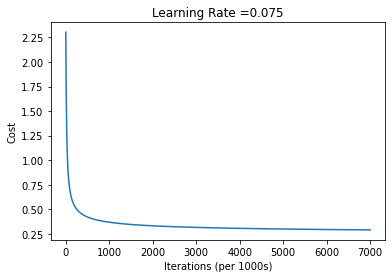

In [28]:
d = {"costs": costs,
         "Y_prediction_test": Y_test,
         "Y_prediction_train": Y_train,
         "w": params["w"],
         "b": params["b"],
         "learning_rate": 0.075,
         "num_iterations": 7000}

# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (per 1000s)')
plt.title("Learning Rate =" + str(d["learning_rate"]))
plt.plot()
plt.show()